In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('pomiary2017.xlsx')
data = data.to_numpy()

In [ ]:
print(data.ndim)
print(data.size)
print(data.shape)

print(data.flatten())

y = data.flatten()
y[0] = 10000

print(data)

In [ ]:
wzrosty = data[:, 5]
wagi = data[:, 4]
plec = data[:, 6]

# zamieniamy wage i wzrost drugiego czlowieka
temp = wzrosty[1]
wzrosty[1] = wagi[1]
wagi[1] = temp

In [14]:
print(np.mean(wzrosty))

177.51162790697674


In [15]:
# wzrost 3 nie istnial
wzrosty[3] = 177

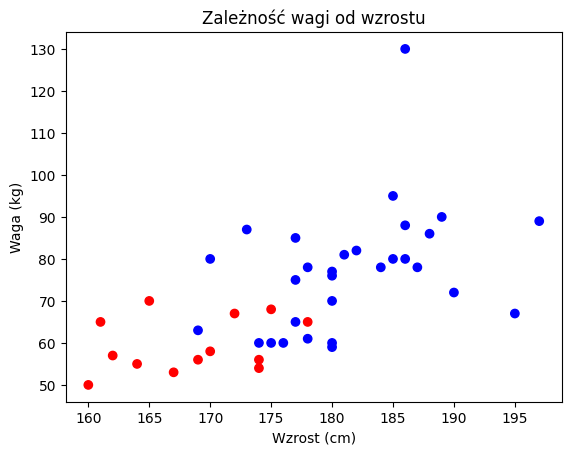

In [16]:
# scatter plot with color by gender
colors = ['blue' if p == 'M' else 'red' for p in plec]
plt.scatter(wzrosty, wagi, c=colors)
plt.xlabel('Wzrost (cm)')
plt.ylabel('Waga (kg)')
plt.title('Zależność wagi od wzrostu')
plt.show()

In [ ]:
#np.array([[1, 2, 3]])
tab = np.arange(12)
print(tab.shape)
#tab.reshape(3, 4)
#tab.reshape(3, -1)

print(tab)
print(tab.reshape(1, -1))

#tab[np.newaxis, :] #niby to samo ale czyściej

#przydatne funkcje:
#hstack
#vstack
#column_stack

(12,)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3  4  5  6  7  8  9 10 11]]


In [17]:
# Linear Regression for wzrosty and wagi
lr = LinearRegression()

# Reshape wzrosty and wagi to be 2D arrays for LinearRegression
wzrosty_reshaped = wzrosty.reshape(-1, 1)
wagi_reshaped = wagi.reshape(-1, 1)

# Fit the model
lr.fit(wzrosty_reshaped, wagi_reshaped)

# Print the coefficients
print("Coefficient:", lr.coef_)
print("Intercept:", lr.intercept_)

lr.predict([[176]])

lr.score(wzrosty_reshaped, wagi_reshaped)

Coefficient: [[1.00937136]]
Intercept: [-107.47813348]


0.34952976706613514

In [18]:
# Example of train-test split using scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wzrosty_reshaped, wagi_reshaped, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (34, 1) (34, 1)
Testing set shape: (9, 1) (9, 1)


In [19]:
# Train the model on the training data and predict on the test data
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Print predictions and actual values
print("Predictions:", y_pred.flatten())
print("Actual values:", y_test.flatten())

print(lr.score(X_test, y_test))

Predictions: [63.18083041 68.40118302 64.22490094 63.18083041 64.22490094 54.82826624
 69.44525355 79.88595877 74.66560616]
Actual values: [63 54 80 56 58 65 60 80 70]
-0.008164405915639605


In [ ]:
# cross_val_score

In [ ]:
import numpy as np

def bootstrap(data, n_iterations, sample_size):
    statistics = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        stat = np.mean(sample)
        statistics.append(stat)
    return statistics

print(boo)